Dicionário de dados

https://dados.cvm.gov.br/dataset/fidc-doc-inf_mensal/resource/e44f6341-9827-4599-baf3-ac5e298e55f7

https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv

# Class FIDC

Dicionário de dados

https://dados.cvm.gov.br/dataset/fidc-doc-inf_mensal/resource/e44f6341-9827-4599-baf3-ac5e298e55f7

- direitos creditorios (tabela V, a)
- creditos vencidos (tabela V, b)
- total de dir. creditorios (tabela II)
- títulos públicos (tabela I, d)
- títulos privados
- fundos de renda fixa (tabela I, c)
- saldo tesouraria
- PDD (tabela I, a.11)

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns 

In [3]:
class info_fidc(object):
    
    def __init__(self, cnpj, ano_inicial, ano_final, mes_inicial):
        self.cnpj = cnpj
        self.ano_inicial = ano_inicial
        self.ano_final = ano_final
        self.mes_inicial = mes_inicial

    def cadastro_fidc(self):    
        url = "https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"
        df = pd.read_csv(url, encoding = "latin1", sep=';', low_memory=False)
        df = df[df["CNPJ_FUNDO"] == self.cnpj][["TP_FUNDO", "DENOM_SOCIAL", "DT_REG", "SIT", "CONDOM", "PUBLICO_ALVO", "VL_PATRIM_LIQ", "DT_PATRIM_LIQ"]].reset_index(drop = True) 
        return df

    def cadastro_fidc_II(self):    
        url = "https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"
        df = pd.read_csv(url, encoding = "latin1", sep=';', low_memory=False)
        df = df[df["CNPJ_FUNDO"] == self.cnpj][["ADMIN", "GESTOR", "AUDITOR", "CUSTODIANTE"]].reset_index(drop = True) 
        return df

    def tabela_12meses(self, tabela):
        # CNPJ deve estar no formato XX.XXX.XXX/XXX-XX
        # Retorna 12 meses

        if self.ano_final == None:
            parameters_1 = {}
            for i in range (self.mes_inicial, self.mes_inicial + 12):
                path = "/content/drive/MyDrive/Colab Notebooks/09 - FIDC/base_de_dados/FIDC/inf_mensal_fidc_{:02d}{:02d}/inf_mensal_fidc_tab_{}_{:02d}{:02d}.csv".format(self.ano_inicial, i, tabela, self.ano_inicial, i)
                df_temp = pd.read_csv(path, encoding = "latin1", sep=';', engine = "python", error_bad_lines = False, warn_bad_lines = False)
                parameters_1["W" + str(i)] = df_temp[df_temp["CNPJ_FUNDO"] == self.cnpj]
            df_1 = pd.concat(parameters_1.values()).reset_index(drop = True)
            df_1["DT_COMPTC"] = df_1["DT_COMPTC"].apply(pd.to_datetime).dt.strftime('%d-%m-%Y')
            
            return df_1
        
        elif self.ano_final != None:
            parameters_1 = {}
            for i in range (self.mes_inicial, self.mes_inicial + (12 - self.mes_inicial)):
                path = "/content/drive/MyDrive/Colab Notebooks/09 - FIDC/base_de_dados/FIDC/inf_mensal_fidc_{:02d}{:02d}/inf_mensal_fidc_tab_{}_{:02d}{:02d}.csv".format(self.ano_inicial, i, tabela, self.ano_inicial, i)
                df_temp = pd.read_csv(path, encoding = "latin1", sep=';', engine = "python", error_bad_lines = False, warn_bad_lines = False)
                parameters_1["W" + str(i)] = df_temp[df_temp["CNPJ_FUNDO"] == self.cnpj]
            df_1 = pd.concat(parameters_1.values()).reset_index(drop = True)
            df_1["DT_COMPTC"] = df_1["DT_COMPTC"].apply(pd.to_datetime).dt.strftime('%d-%m-%Y')

            parameters_2 = {}
            for i in range (1, self.mes_inicial):
                path = "/content/drive/MyDrive/Colab Notebooks/09 - FIDC/base_de_dados/FIDC/inf_mensal_fidc_{:02d}{:02d}/inf_mensal_fidc_tab_{}_{:02d}{:02d}.csv".format(self.ano_final, i, tabela, self.ano_final, i)
                df_temp = pd.read_csv(path, encoding = "latin1", sep=';', engine = "python", error_bad_lines = False, warn_bad_lines = False)
                parameters_2["W" + str(i)] = df_temp[df_temp["CNPJ_FUNDO"] == self.cnpj]
            df_2 = pd.concat(parameters_2.values()).reset_index(drop = True)
            df_2["DT_COMPTC"] = df_2["DT_COMPTC"].apply(pd.to_datetime).dt.strftime('%d-%m-%Y')
        
        return pd.concat([df_1, df_2], ignore_index = True, axis = 0)

    def get_carteira(self):
    # Gera uma planilha com  carteira dos últimos 12 meses

        direitos_creditorios = info_fidc.tabela_12meses(self, tabela = "V")
        direitos_creditorios = direitos_creditorios[["DT_COMPTC", "TAB_V_A_VL_DIRCRED_PRAZO","TAB_V_B_VL_DIRCRED_INAD"]].T
        a1 = direitos_creditorios.rename(columns = direitos_creditorios.iloc[0], index={"TAB_V_A_VL_DIRCRED_PRAZO": 'Direitos Creditórios',
                                                                                "TAB_V_B_VL_DIRCRED_INAD": "Créditos Vencidos"}).drop(direitos_creditorios.index[0])
        total_direitos_creditorios = info_fidc.tabela_12meses(self, tabela = "II")
        total_direitos_creditorios = total_direitos_creditorios[["DT_COMPTC", "TAB_II_VL_CARTEIRA"]].T
        a2 = total_direitos_creditorios.rename(columns = total_direitos_creditorios.iloc[0], index={"TAB_II_VL_CARTEIRA": 'Total de Direitos Creditórios'}).drop(total_direitos_creditorios.index[0])

        tabela_I = info_fidc.tabela_12meses(self, tabela = "I")
        tabela_I = tabela_I[["DT_COMPTC", "TAB_I2D_VL_TITPUB_FED", "TAB_I2C_VL_VLMOB", "TAB_I1_VL_DISP","TAB_I2E_VL_CDB", "TAB_I2F_VL_OPER_COMPROM"]].T

        a3 = tabela_I.rename(columns = tabela_I.iloc[0], index={'TAB_I2D_VL_TITPUB_FED': "Títulos Públicos",
                                                                "TAB_I2C_VL_VLMOB": "Fundos Renda Fixa", "TAB_I1_VL_DISP": "Saldo Tesouraria",
                                                                "TAB_I2E_VL_CDB": "column1", "TAB_I2F_VL_OPER_COMPROM": "column2"}).drop(tabela_I.index[0])
        a3.loc["Títulos Privados"] = a3.loc["column1"] + a3.loc["column2"]      
        a3.drop(["column1", "column2"], axis = 0, inplace = True)                                                
        a3 = a3.loc[["Títulos Públicos", "Títulos Privados", "Fundos Renda Fixa", "Saldo Tesouraria"]]
        
        d = pd.concat([a2, a3], axis = 0)
        d = d.T
        d["Total Geral da Carteira"] = d["Total de Direitos Creditórios"] + d["Títulos Públicos"] + d["Fundos Renda Fixa"] + d["Saldo Tesouraria"]
        b1 = d.T

        pdd = info_fidc.tabela_12meses(self, tabela = "I")
        pdd = pdd[["DT_COMPTC", "TAB_I2A11_VL_REDUCAO_RECUP"]].T
        c1 = pdd.rename(columns = pdd.iloc[0], index={"TAB_I2A11_VL_REDUCAO_RECUP": "PDD"}).drop(pdd.index[0])
        c1 = -c1
        patrimonio_liquido = info_fidc.tabela_12meses(self, tabela = "IV")
        patrimonio_liquido = patrimonio_liquido[["DT_COMPTC", "TAB_IV_A_VL_PL"]].T
        d1 = patrimonio_liquido.rename(columns = patrimonio_liquido.iloc[0], index={'TAB_IV_A_VL_PL': 'Patrimônio Líquido'}).drop(patrimonio_liquido.index[0])
        
        carteira = pd.concat([a1, b1, c1, d1], axis = 0)
        return carteira

    def get_pl(self):
        patrimonio_liquido = info_fidc.tabela_12meses(self, tabela = "IV")
        patrimonio_liquido = patrimonio_liquido[["DT_COMPTC", "TAB_IV_A_VL_PL"]].T
        pl = patrimonio_liquido.rename(columns = patrimonio_liquido.iloc[0], index={'TAB_IV_A_VL_PL': 'Patrimônio Líquido'}).drop(patrimonio_liquido.index[0])
        return pl
    
    def get_carteira_mil(self):
        carteira_mil = info_fidc.get_carteira(self)/1000
        return carteira_mil
    
    def get_carteira_percentual(self):
        pl = info_fidc.get_pl(self)
        df = info_fidc.get_carteira(self)/pl.loc["Patrimônio Líquido"]*100
        df = np.round(df.astype(float), 1)
        return df

    def inadimplencia_pl(self):
        inadimplencia_tabela = info_fidc.tabela_12meses(self, tabela = "V")
        inadimplencia_tabela = inadimplencia_tabela[["DT_COMPTC", "TAB_V_B_VL_DIRCRED_INAD", "TAB_V_B1_VL_INAD_30", "TAB_V_B2_VL_INAD_60", 
        "TAB_V_B3_VL_INAD_90", "TAB_V_B4_VL_INAD_120", "TAB_V_B5_VL_INAD_150", "TAB_V_B6_VL_INAD_180", "TAB_V_B7_VL_INAD_360",	"TAB_V_B8_VL_INAD_720",
        "TAB_V_B9_VL_INAD_1080", "TAB_V_B10_VL_INAD_MAIOR_1080"]].T
        inadimplencia_tabela = inadimplencia_tabela.rename(columns = inadimplencia_tabela.iloc[0], index = {"TAB_V_B_VL_DIRCRED_INAD": "Inadimplencia total",
        "TAB_V_B1_VL_INAD_30": "até 30 dias", "TAB_V_B2_VL_INAD_60": "até 60 dias", "TAB_V_B3_VL_INAD_90": "até 90 dias", "TAB_V_B4_VL_INAD_120": "até 120 dias",
        "TAB_V_B5_VL_INAD_150": "até 150 dias", "TAB_V_B6_VL_INAD_180": "até 180 dias", "TAB_V_B7_VL_INAD_360": "até 360 dias",
        "TAB_V_B8_VL_INAD_720": "até 720 dias", "TAB_V_B9_VL_INAD_1080": "até 1080 dias",
        "TAB_V_B10_VL_INAD_MAIOR_1080": " acima de 1080 dias"}).drop(inadimplencia_tabela.index[0])
        inadimplencia_percentual = inadimplencia_tabela/info_fidc.get_pl(self).loc["Patrimônio Líquido"]
        inadimplencia_percentual = inadimplencia_percentual.astype(float)*100
        return inadimplencia_percentual
    
    def inadimplencia_mes(self):
        inadimplencia_mes = info_fidc.inadimplencia_pl(self)[[info_fidc.get_carteira(self).columns[-1]]].drop("Inadimplencia total", axis = 0)
        inadimplencia_mes["Acumulada"] = inadimplencia_mes[carteira.columns[-1]].cumsum()
        return inadimplencia_mes

In [6]:
fidc = info_fidc(cnpj = "36.335.619/0001-02", ano_inicial = 2022, ano_final = None, mes_inicial = 1)

In [ ]:
fidc.cadastro_fidc()

In [ ]:
fidc.cadastro_fidc_II()

## Carteira

In [10]:
carteira = fidc.get_carteira()
carteira

,31-01-2022,28-02-2022,31-03-2022,30-04-2022,31-05-2022,30-06-2022,31-07-2022,31-08-2022,30-09-2022,31-10-2022,30-11-2022,31-12-2022
Direitos Creditórios,12527922.10,12467842.48,18874458.98,19942521.05,26144228.80,26755268.94,31804959.01,33444756.71,34166297.59,34395738.99,34572326.66,34984033.66
Créditos Vencidos,3729.03,23146.86,26992.20,22538.97,50740.11,81878.97,126830.80,136971.52,224836.21,329855.18,338151.23,322149.79
Total de Direitos Creditórios,12531651.13,12490989.34,18901451.18,19965060.02,26194968.91,26837147.91,31931789.81,33581728.23,34391133.80,34725594.17,34910477.89,35306183.45
Títulos Públicos,0.00,22599.36,22779.57,22936.42,23209.44,23465.95,23701.13,203793.92,206079.20,208391.40,210498.45,212638.77
Títulos Privados,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fundos Renda Fixa,578489.65,559676.00,3797422.85,2895466.25,4314533.58,9946008.88,5111094.65,3397594.36,2973862.63,2461880.96,2469329.23,2460485.93
Saldo Tesouraria,304.66,399.07,0.00,31.95,90.78,3.11,0.00,0.00,0.00,0.00,0.00,0.00
Total Geral da Carteira,13110445.44,13073663.77,22721653.60,22883494.64,30532802.71,36806625.85,37066585.59,37183116.51,37571075.63,37395866.53,37590305.57,37979308.15
PDD,-2136.14,-3496.09,-11765.18,-21342.97,-55572.34,-70012.54,-110218.08,-163075.51,-228433.23,-289627.15,-368896.23,-498266.63
Patrimônio Líquido,12679410.49,12392505.29,21757754.28,21388662.00,28539645.14,34061742.19,35527294.13,35603803.15,34372367.87,34439935.71,33708617.16,33765015.54


## Carteira (R$ Mil)

In [11]:
carteira_mil = fidc.get_carteira_mil()
carteira_mil

,31-01-2022,28-02-2022,31-03-2022,30-04-2022,31-05-2022,30-06-2022,31-07-2022,31-08-2022,30-09-2022,31-10-2022,30-11-2022,31-12-2022
Direitos Creditórios,12527.92,12467.84,18874.46,19942.52,26144.23,26755.27,31804.96,33444.76,34166.30,34395.74,34572.33,34984.03
Créditos Vencidos,3.73,23.15,26.99,22.54,50.74,81.88,126.83,136.97,224.84,329.86,338.15,322.15
Total de Direitos Creditórios,12531.65,12490.99,18901.45,19965.06,26194.97,26837.15,31931.79,33581.73,34391.13,34725.59,34910.48,35306.18
Títulos Públicos,0.00,22.60,22.78,22.94,23.21,23.47,23.70,203.79,206.08,208.39,210.50,212.64
Títulos Privados,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fundos Renda Fixa,578.49,559.68,3797.42,2895.47,4314.53,9946.01,5111.09,3397.59,2973.86,2461.88,2469.33,2460.49
Saldo Tesouraria,0.30,0.40,0.00,0.03,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Total Geral da Carteira,13110.45,13073.66,22721.65,22883.49,30532.80,36806.63,37066.59,37183.12,37571.08,37395.87,37590.31,37979.31
PDD,-2.14,-3.50,-11.77,-21.34,-55.57,-70.01,-110.22,-163.08,-228.43,-289.63,-368.90,-498.27
Patrimônio Líquido,12679.41,12392.51,21757.75,21388.66,28539.65,34061.74,35527.29,35603.80,34372.37,34439.94,33708.62,33765.02


## Carteira (% PL)

In [12]:
carteira_pl = fidc.get_carteira_percentual()
carteira_pl

,31-01-2022,28-02-2022,31-03-2022,30-04-2022,31-05-2022,30-06-2022,31-07-2022,31-08-2022,30-09-2022,31-10-2022,30-11-2022,31-12-2022
Direitos Creditórios,98.80,100.60,86.70,93.20,91.60,78.50,89.50,93.90,99.40,99.90,102.60,103.60
Créditos Vencidos,0.00,0.20,0.10,0.10,0.20,0.20,0.40,0.40,0.70,1.00,1.00,1.00
Total de Direitos Creditórios,98.80,100.80,86.90,93.30,91.80,78.80,89.90,94.30,100.10,100.80,103.60,104.60
Títulos Públicos,0.00,0.20,0.10,0.10,0.10,0.10,0.10,0.60,0.60,0.60,0.60,0.60
Títulos Privados,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fundos Renda Fixa,4.60,4.50,17.50,13.50,15.10,29.20,14.40,9.50,8.70,7.10,7.30,7.30
Saldo Tesouraria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Total Geral da Carteira,103.40,105.50,104.40,107.00,107.00,108.10,104.30,104.40,109.30,108.60,111.50,112.50
PDD,-0.00,-0.00,-0.10,-0.10,-0.20,-0.20,-0.30,-0.50,-0.70,-0.80,-1.10,-1.50
Patrimônio Líquido,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


# Gráficos

## Gráfico Barras

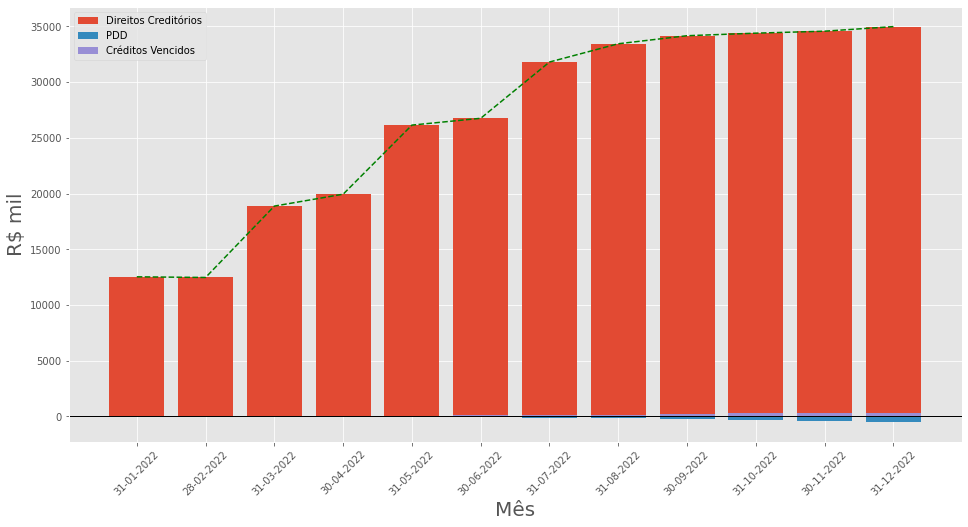

In [13]:
plt.figure(figsize = (16,8))
fig = plt.bar(carteira_mil.columns.values, carteira_mil.loc['Direitos Creditórios'], label = "Direitos Creditórios")
plt.plot(carteira_mil.columns.values, carteira_mil.loc['Direitos Creditórios'], color = "green", linestyle = "--")
plt.bar(carteira_mil.columns.values, carteira_mil.loc['PDD'], label = "PDD")
plt.bar(carteira_mil.columns.values, carteira_mil.loc['Créditos Vencidos'], label = "Créditos Vencidos")
plt.xlabel("Mês", fontsize = 20)
plt.ylabel("R$ mil", fontsize = 20)
plt.xticks(rotation=45)
plt.axhline(linewidth = 1, color = "black")
plt.legend()

## Direitos Creditórios (Mínimo)

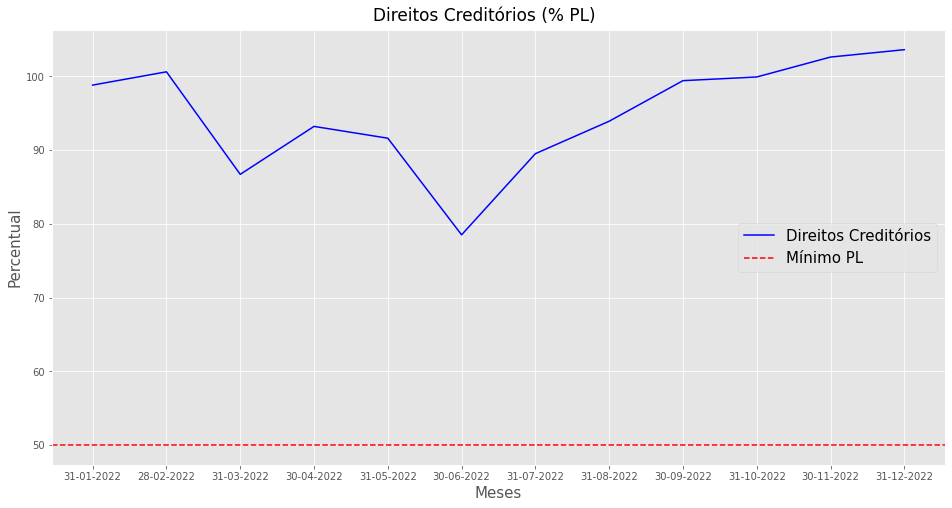

In [15]:
plt.figure(figsize = (16,8))
plt.suptitle("Direitos Creditórios (% PL)", x = 0.5, y = 0.92, fontsize = 17)
plt.plot(fidc.get_carteira_percentual().loc["Direitos Creditórios"], color = "blue")
plt.xlabel("Meses", fontsize = 15)
plt.ylabel("Percentual", fontsize = 15)
plt.axhline(y = 50, color='r', linestyle='dashed')
plt.legend(["Direitos Creditórios", "Mínimo PL"], fontsize = 15)
plt.show()

## Créditos Vencidos x PDD

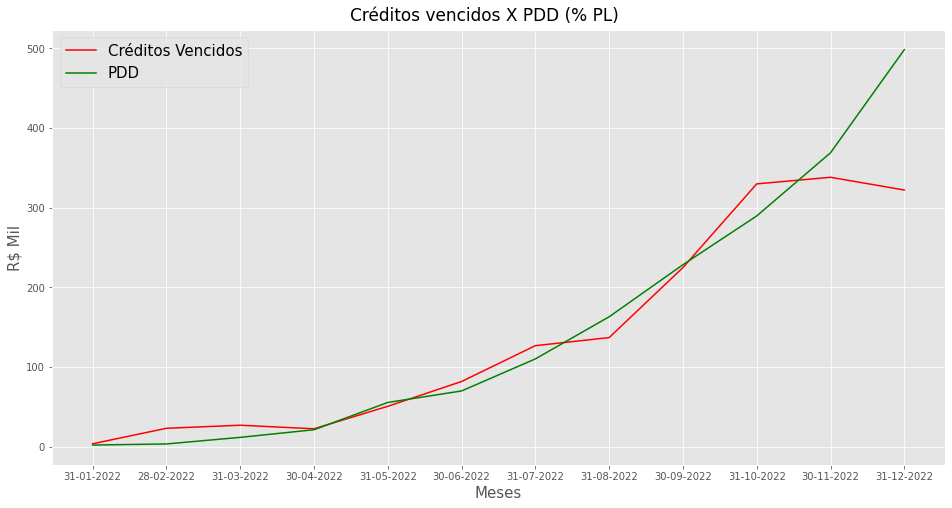

In [17]:
plt.figure(figsize = (16,8))
plt.suptitle("Créditos vencidos X PDD (% PL)", x = 0.5, y = 0.92, fontsize = 17)
plt.plot(carteira_mil.loc['Créditos Vencidos'], color = "red")
plt.plot(-carteira_mil.loc["PDD"], color = "green")
plt.xlabel("Meses", fontsize = 15)
plt.ylabel("R$ Mil", fontsize = 15)
plt.legend(["Créditos Vencidos", "PDD"], fontsize = 15)
plt.show()

# Cotas

In [18]:
fidc_tabela_cotas = fidc.tabela_12meses("X_2")
fidc_tabela_cotas = fidc_tabela_cotas.drop(["CNPJ_FUNDO", "DENOM_SOCIAL"], axis = 1)

In [19]:
fidc_tabela_cotas[fidc_tabela_cotas["DT_COMPTC"] == carteira.columns[-1]].reset_index(drop = True)

,DT_COMPTC,TAB_X_CLASSE_SERIE,TAB_X_QT_COTA,TAB_X_VL_COTA
0,31-12-2022,Classe Subordinada 1,39648.40,851.61
1,31-12-2022,Senior 1,0.00,0.00


In [ ]:
for i in fidc_tabela_cotas["TAB_X_CLASSE_SERIE"].value_counts().index:
    print(i) 

Classe Subordinada 1
Classe Subordinada 2
Senior 1


In [20]:
fidc_tabela_cotas[fidc_tabela_cotas["TAB_X_CLASSE_SERIE"] == fidc_tabela_cotas["TAB_X_CLASSE_SERIE"].value_counts().index[0]].reset_index(drop = True)[["DT_COMPTC", "TAB_X_CLASSE_SERIE","TAB_X_VL_COTA" ]]

,DT_COMPTC,TAB_X_CLASSE_SERIE,TAB_X_VL_COTA
0,31-01-2022,Classe Subordinada 1,926.49
1,28-02-2022,Classe Subordinada 1,905.53
2,31-03-2022,Classe Subordinada 1,893.56
3,30-04-2022,Classe Subordinada 1,878.41
4,31-05-2022,Classe Subordinada 1,870.39
5,30-06-2022,Classe Subordinada 1,859.10
6,31-07-2022,Classe Subordinada 1,896.06
7,31-08-2022,Classe Subordinada 1,897.99
8,30-09-2022,Classe Subordinada 1,866.93
9,31-10-2022,Classe Subordinada 1,868.63


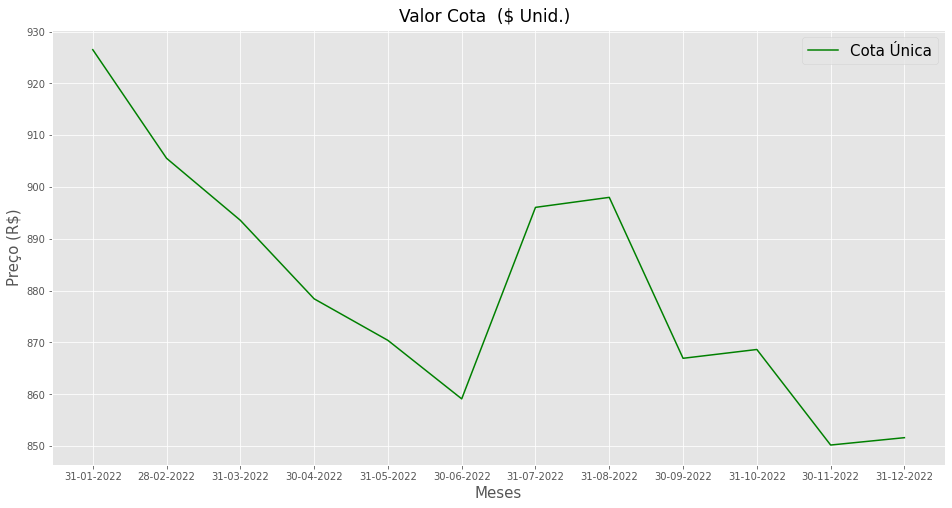

In [23]:
cota_unica = fidc_tabela_cotas[fidc_tabela_cotas["TAB_X_CLASSE_SERIE"] == "Classe Subordinada 1"]

plt.figure(figsize = (16,8))
plt.suptitle("Valor Cota  ($ Unid.)", x = 0.5, y = 0.92, fontsize = 17)
sns.lineplot(data = cota_unica, x = "DT_COMPTC", y = "TAB_X_VL_COTA", color = "green")
plt.xlabel("Meses", fontsize = 15)
plt.ylabel("Preço (R$)", fontsize = 15)
plt.legend(["Cota Única"], loc = "upper right", fontsize = 15)

# Inadimplência

In [24]:
inadimplencia_tabela = fidc.inadimplencia_pl()
inadimplencia_tabela

,31-01-2022,28-02-2022,31-03-2022,30-04-2022,31-05-2022,30-06-2022,31-07-2022,31-08-2022,30-09-2022,31-10-2022,30-11-2022,31-12-2022
Inadimplencia total,0.03,0.19,0.12,0.11,0.18,0.24,0.36,0.38,0.65,0.96,1.00,0.95
até 30 dias,0.02,0.17,0.04,0.01,0.00,0.09,0.17,0.06,0.29,0.35,0.06,0.02
até 60 dias,0.00,0.01,0.08,0.01,0.11,0.00,0.04,0.14,0.02,0.26,0.32,0.05
até 90 dias,0.01,0.01,0.00,0.07,0.01,0.09,0.08,0.04,0.15,0.02,0.26,0.28
até 120 dias,0.01,0.01,0.00,0.00,0.06,0.01,0.01,0.00,0.05,0.15,0.02,0.25
até 150 dias,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.09,0.09,0.04,0.15,0.02
até 180 dias,0.00,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.00,0.00,0.04,0.15
até 360 dias,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.05,0.06,0.14,0.15,0.18
até 720 dias,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
até 1080 dias,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [25]:
inadimplencia_mes = fidc.inadimplencia_mes()
inadimplencia_mes

,31-12-2022,Acumulada
até 30 dias,0.02,0.02
até 60 dias,0.05,0.06
até 90 dias,0.28,0.34
até 120 dias,0.25,0.60
até 150 dias,0.02,0.62
até 180 dias,0.15,0.77
até 360 dias,0.18,0.95
até 720 dias,0.00,0.95
até 1080 dias,0.00,0.95
acima de 1080 dias,0.00,0.95


# Rentabilidade

In [26]:
fidc_rentabilidade = fidc.tabela_12meses(tabela = "X_3")
fidc_rentabilidade

,CNPJ_FUNDO,DENOM_SOCIAL,DT_COMPTC,TAB_X_CLASSE_SERIE,TAB_X_VL_RENTAB_MES
0,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,31-01-2022,Classe Subordinada 1,3.09
1,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,31-01-2022,Senior 1,0.00
2,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,28-02-2022,Classe Subordinada 1,-2.26
3,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,28-02-2022,Senior 1,0.00
4,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,31-03-2022,Classe Subordinada 1,-1.32
5,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,31-03-2022,Senior 1,0.00
6,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,30-04-2022,Classe Subordinada 1,-1.70
7,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,30-04-2022,Senior 1,0.00
8,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,31-05-2022,Classe Subordinada 1,-0.91
9,36.335.619/0001-02,FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ...,31-05-2022,Senior 1,0.00


In [27]:
cota_unica_rentabilidade = fidc_rentabilidade[fidc_rentabilidade["TAB_X_CLASSE_SERIE"] == "Classe Subordinada 1"]
cota_unica_rentabilidade = cota_unica_rentabilidade.set_index("DT_COMPTC").drop(['CNPJ_FUNDO', 'DENOM_SOCIAL', 'TAB_X_CLASSE_SERIE'], axis = 1)
cota_unica_rentabilidade


,TAB_X_VL_RENTAB_MES
DT_COMPTC,
31-01-2022,3.09
28-02-2022,-2.26
31-03-2022,-1.32
30-04-2022,-1.70
31-05-2022,-0.91
30-06-2022,-1.30
31-07-2022,4.30
31-08-2022,0.22
30-09-2022,-3.46


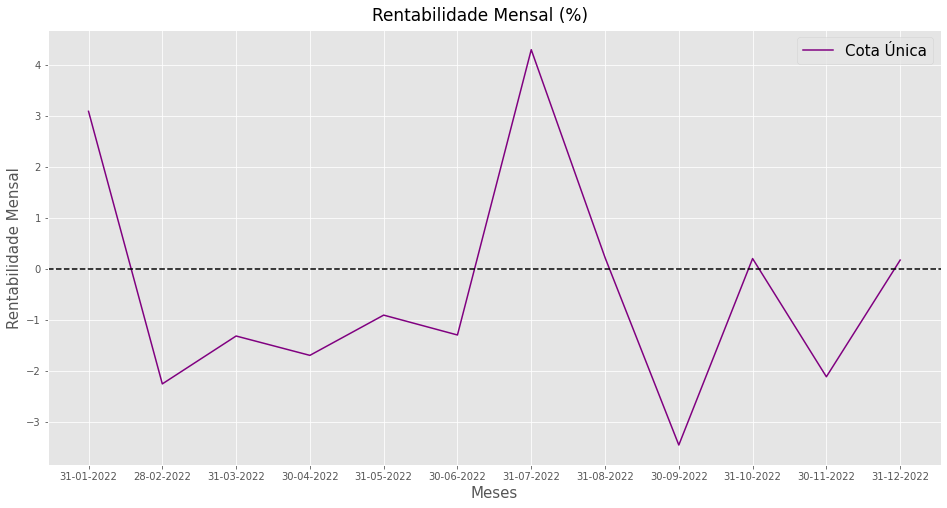

In [28]:
plt.figure(figsize = (16,8))
plt.suptitle("Rentabilidade Mensal (%)", x = 0.5, y = 0.92, fontsize = 17)
sns.lineplot(data = cota_unica_rentabilidade, x = "DT_COMPTC", y = "TAB_X_VL_RENTAB_MES", color = "purple")
plt.xlabel("Meses", fontsize = 15)
plt.ylabel("Rentabilidade Mensal", fontsize = 15)
plt.axhline(y=0, color='k', linestyle = 'dashed')
plt.legend(["Cota Única"], loc = "best", fontsize = 15)
plt.show()